In [1]:
import numpy as np
import scipy.special as special
import scipy.integrate as integrate

import matplotlib.pyplot as plt
import time
import mpmath

In [2]:
sin_np = np.frompyfunc(mpmath.sin, 1, 1)
besselj_np = np.frompyfunc(mpmath.besselj, 2, 1)
log10_np = np.frompyfunc(mpmath.log10, 1, 1)
np_div = np.frompyfunc(mpmath.fdiv, 2, 1)
np_mul = np.frompyfunc(mpmath.fmul, 2, 1)

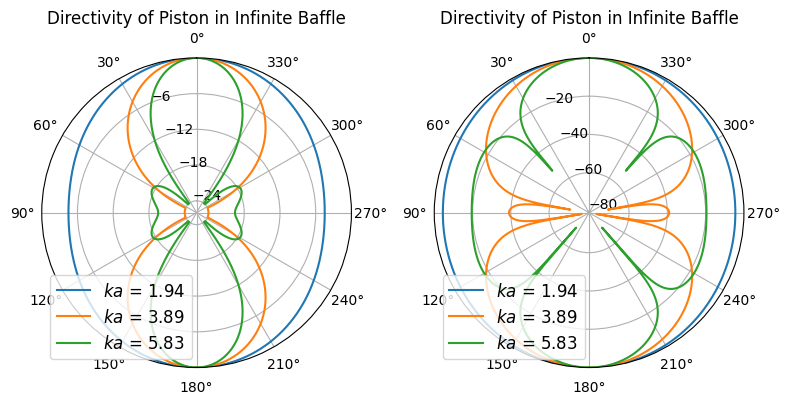

In [38]:
v_sound = mpmath.mpf(343.0)
frequency = np.arange(2.5e4, 1e5, 2.5e4)
frequency = frequency.reshape(1, frequency.shape[0])

wavelength = np_div(v_sound,frequency)
k = np_div(2*mpmath.pi, wavelength) # AKA wavenumber

alpha = mpmath.pi/4.0 # report of gape angle of 90 degrees --> 45degrees half angle

#%%
# Here I'm assuming a total skull 'diameter' of 1.2 cm, and thus a radius of 6mm
# The value is admittedly a 'data-free' choice, and perhaps the actual effective 
# 'sphere' is really the inside of the mouth cavity!!
R = 6e-3

paramv = {}
paramv['R'] = R # This is admittedly a 'data-free' choice
paramv['alpha'] = alpha
paramv['k'] = k

a = paramv['R']*mpmath.sin(paramv['alpha'])
ka = np_mul(k, a)

labs = []
for p in ka[0]:
    labs += [f'$ka$ = {round(p, 2)}']

theta = np.linspace(-np.pi, np.pi, 1000)
theta = theta.reshape(theta.shape[0], 1)

D_theta = np_div(2*besselj_np(1, ka*sin_np(theta)), ka*sin_np(theta))
D_theta_dB = 20*log10_np(np.abs(D_theta))
clipped_D_theta_dB = np.clip(D_theta_dB, -24, None)

fig = plt.figure(figsize=(8, 4))
a0 = fig.add_subplot(121, projection='polar')
a0.set_title(f"Directivity of Piston in Infinite Baffle")
a0.plot(theta, clipped_D_theta_dB)
a0.set_xticks(np.arange(0,2*np.pi,np.pi/6))
a0.set_yticks(np.arange(-24,0,6))
a0.set_ylim(-26, 0)
a0.set_theta_zero_location('N')
a0.legend(labs, loc=3, fontsize=12)

a1 = fig.add_subplot(122, projection='polar')
a1.set_title(f"Directivity of Piston in Infinite Baffle")
a1.plot(theta, D_theta_dB)
a1.set_xticks(np.arange(0,2*np.pi,np.pi/6))
a1.set_yticks(np.arange(-80,0,20))
a1.set_theta_zero_location('N')
a1.legend(labs, loc=3, fontsize=12)

plt.tight_layout()
plt.show()

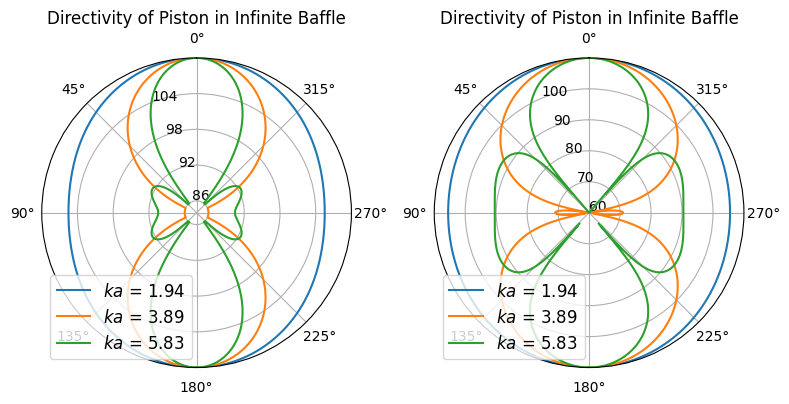

In [36]:
fig = plt.figure(figsize=(8, 4))
a0 = fig.add_subplot(121, projection='polar')
a0.set_title(f"Directivity of Piston in Infinite Baffle")
a0.plot(theta, clipped_D_theta_dB+110)
a0.set_xticks(np.arange(0,2*np.pi,np.pi/4))
a0.set_yticks(np.arange(86,110,6))
a0.set_ylim(84, 110)
a0.set_theta_zero_location('N')
a0.legend(labs, loc=3, fontsize=12)

a1 = fig.add_subplot(122, projection='polar')
a1.set_title(f"Directivity of Piston in Infinite Baffle")
a1.plot(theta, D_theta_dB+110)
a1.set_xticks(np.arange(0,2*np.pi,np.pi/4))
a1.set_yticks(np.arange(60,110,10))
a1.set_ylim(60, 110)
a1.set_theta_zero_location('N')
a1.legend(labs, loc=3, fontsize=12)

plt.tight_layout()
plt.show()